### Scenario:
> *PT Maju Makmur Sentosa Raya ingin mengetahui apakah **desain web baru mereka dapat meningkatkan conversion rate web** mereka. Perusahaan tersebut memiliki **data historis conversion rate dari desain lama dan desain baru selama 30 hari ke belakang**. Data tersebut diberikan dalam format csv dengan kolom **conversion_a adalah conversion rate harian dari desain web lama** dan kolom **conversion_b adalah conversion rate harian dari desain web baru**. Perusahaan ingin mengetahui apakah rata-rata conversion rate dari desain baru lebih besar dari desain lama.*

**A/B Testing steps:**
1. Designing our experiment
2. Collecting and preparing the data
3. Visualising the results
4. Testing the hypothesis
5. Drawing conclusions

### Designing our experiment

#### Formulating a hypothesis

In the scenario above the company wants to know whether the average conversion rate of the new design is greater than the old design. Given that case, we'll choose a **one-tailed test**. So our hypothesis will be:

  - H0 : µ0 >= µ (The average conversion rate of the old design is higher than or equal to the new design)
  - H1 : µ > µ0  (The average conversion rate of the new design is higher than the old design)

Where **µ** and **µ0** stands for the average conversion rate of the new and old design respectively.

We will calculate our hypothesis with two sample t-test, and use **α = 0.05** which means our confidence level is **95%**. Since Scipy provides two sample t-test function called ttest_ind, but which can only do two-tailed t-tests. Closest information on the topic I found in this link, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

> *because the one-sided tests can be backed out from the two-sided tests. (With symmetric distributions one-sided p-value is just half of the two-sided pvalue)*

Given the p and t values from a two-tailed test, so we would reject the null hypothesis when **p/2 < alpha and t > 0**.

### Collecting and preparing the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns### Designing our experiment
from scipy import stats

sns.set()
sns.set_theme(style = 'whitegrid')

In [2]:
data = pd.read_csv('hw_data.csv')
data.head()

,Day,Conversion_A,Conversion_B
0,1,0.15,0.19
1,2,0.12,0.20
2,3,0.18,0.18
3,4,0.19,0.22
4,5,0.17,0.19


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day           30 non-null     int64  
 1   Conversion_A  30 non-null     float64
 2   Conversion_B  30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [4]:
#Melt our table for the easier look
data = data.melt(id_vars = 'Day', var_name = 'Group', value_name = 'Conversion')
data = data.drop(columns = 'Day')
data.head()

,Group,Conversion
0,Conversion_A,0.15
1,Conversion_A,0.12
2,Conversion_A,0.18
3,Conversion_A,0.19
4,Conversion_A,0.17


#### Sampling

In [5]:
#Sample our data
control_sample = data[data['Group'] == 'Conversion_A'].sample(n = 30, random_state = 42)
treatment_sample = data[data['Group'] == 'Conversion_B'].sample(n = 30, random_state = 42)

ab_test = pd.concat([control_sample, treatment_sample], axis = 0)
ab_test.reset_index(drop = True, inplace = True)

ab_test.head()

,Group,Conversion
0,Conversion_A,0.21
1,Conversion_A,0.21
2,Conversion_A,0.11
3,Conversion_A,0.18
4,Conversion_A,0.11


In [6]:
ab_test["Group"].value_counts()

Conversion_A    30
Conversion_B    30
Name: Group, dtype: int64

### Visualising the results

In [7]:
conversion_rates = ab_test.groupby("Group")["Conversion"].agg([np.mean, np.std, stats.sem])
conversion_rates.columns = ["avg_conversion", "std_deviation", "std_error"]

conversion_rates

,avg_conversion,std_deviation,std_error
Group,,,
Conversion_A,0.162000,0.036141,0.006599
Conversion_B,0.193333,0.027334,0.004990


We can see that **the mean of Conversion_B is greater than the mean of Conversion_A**. This means that the new design has greater conversion rate than the old design. But let's check if this result is statistically significant.

<AxesSubplot:xlabel='Group', ylabel='Conversion'>

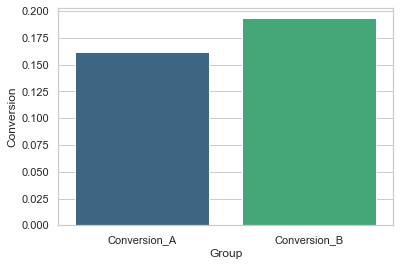

In [8]:
sns.barplot(x = ab_test['Group'], y = ab_test['Conversion'], ci = False, palette = 'viridis')

## Testing the hypothesis

In [9]:
control_results = ab_test[ab_test['Group'] == 'Conversion_A']['Conversion']
treatment_results = ab_test[ab_test['Group'] == 'Conversion_B']['Conversion']


tval, pval = stats.ttest_ind(a=treatment_results, b=control_results)

print(f't-value: {tval}')
print(f'p-value: {pval/2}')

t-value: 3.7873679309192925
p-value: 0.00018189800641437955


## Drawing conclusions

Our ***p*-value = 0.0002 is way less than α = 0.05 and the t-value is greater than 0**. This means that we success to reject the null hypothesis, which means that **the avarage conversion rate of the new design is significantly greater than the old one**.